In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
from tqdm.notebook import tqdm, trange

In [4]:
### Functions to read files
# Must be in .csv format

import re
import os

def get_list(folder,crypto):
    file_list = os.listdir(folder)
    r = re.compile(crypto)
    crypto_list = list(filter(r.match, file_list))
    return(crypto_list)

def read_files(folder,crypto):
    list_of_files = get_list(folder,crypto)
    df = pd.read_csv((folder+'/'+list_of_files[0]))
    for i in (list_of_files[1:]):
        df = df.append(pd.read_csv((folder+'/'+i)))
    df = df.sort_values('system_time')
    df = df.reset_index(drop=True)
    return(df)

In [5]:
folder = 'crypto-rl/data_recorder/database/data_exports/1min'

In [6]:
folder = 'data/raw/1sec'

In [7]:
BTC_df = read_files(folder,'BTC')
ETH_df = read_files(folder, 'ETH')
ADA_df = read_files(folder, 'ADA')
#LINK_df = read_files(folder,'LINK')

In [8]:
np.rep

AttributeError: module 'numpy' has no attribute 'rep'

In [8]:
BTC_df

,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
0,2021-04-07 11:32:42.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-04-07 11:32:43.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-04-07 11:32:44.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-04-07 11:32:45.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-04-07 11:32:46.122161+00:00,56035.995,0.01,0.000000,0.000000,-8.922836e-08,-2.676851e-07,-0.000050,-0.000245,-0.000288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030723,2021-04-19 09:54:18.386544+00:00,56863.725,0.01,0.000000,0.000000,-8.792952e-08,-2.637886e-07,-0.000025,-0.000026,-0.000031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030724,2021-04-19 09:54:19.386544+00:00,56863.725,0.01,0.000000,0.000000,-8.792952e-08,-2.637886e-07,-0.000026,-0.000031,-0.000034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030725,2021-04-19 09:54:20.386544+00:00,56863.725,0.01,1506.866100,0.000000,-8.792952e-08,-2.637886e-07,-0.000026,-0.000034,-0.000103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030726,2021-04-19 09:54:21.386544+00:00,56863.725,0.01,0.000000,0.000000,-8.792952e-08,-2.637886e-07,-0.000026,-0.000034,-0.000133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def check_for_missing(df, freq):
    time = df['system_time']
    t = pd.to_datetime(time[:(len(time)-1)]).reset_index(drop=True)
    t_1 = pd.to_datetime(time[1:]).reset_index(drop=True)
    diff = (t_1-t) / freq
    
    errors = np.sum(diff != '0 days 00:00:01')
    
    
        
    return(errors)

In [10]:
check_for_missing(ADA_df, freq = 1)

71

In [11]:
len(ADA_df)

1030533

# Feature Engineering 

We are interested Econometric features: 

Statistical features: 
- Mid-price
- Financial Duration
- Average Mid-Price Financial Duration
- Log-Returns

Volatility MEasures: 
- Realized Volatility
- Realized Kernel
- Realized Pre-Averaged Varianced
- Realized Semi-Variance
- Realized Bipower Variation
- Realized Bipower Variation (lag 2)
- Realized Bipower Semi-Variance
- Jump Variation
- Spot Volatility
- Average Spot Volatility

Noise and Uncertainty Measures
- Realized Quarticity 
- Realized Quarticity Tripower
- Realized Quarticity Quadpower
- Noise Variance (42)
- Noise Variance (57)

Price Discovery Features: 
- Weighted mid-price by order imbalance
- Volume Imbalance
- Bid-Ask Spread
- Normalized Bid-Ask Spread


Notation: 
Y = Midpoint,
X = Log(Midpoint)

Log-returns:

In [12]:
def Returns(df):
    df["Return"] = np.nan
    #df["Return"] = np.diff(df["midpoint"]) / df["midpoint"][:(len(df)-1)]
    rt = diff(np.log(df["midpoint"]))
    df = df[:-1]
    df["Return"] = rt
    
    return(df)

Realized Voaltility: 
$$RV_n = \sum_{i=1}^n(X_{i/n}- X_{(i-1)/n}) $$


In [13]:
def RealizedVolatility(df, freq):
    df["RV"] = np.nan
    for i in trange((len(df)-freq)):
        df['RV'][(i+freq)] = sum(df['Return'][i:(freq+i)]**2)
    return(df)

Realized Semivariance

In [14]:
def RealizedSemiVariance(df,freq):
    df["RSV_pos"] = np.nan
    df["RSV_neg"] = np.nan
    
    for i in trange((len(df)) - freq): 
        X = df['Return'][i:(freq+i)].reset_index(drop = True)
        
        X_pos = X[X > 0]
        df["RSV_pos"][(i+1+freq)] = sum(X_pos**2)
        
        X_neg = X[X < 0]
        df["RSV_neg"][(i+1+freq)]  = sum(X_neg**2)
        
        
    return(df)

Realized Bipower Variation: 

$$BV_n =  \frac{2}{\pi}\sum_{i=1}^{n-1}\vert X_{\frac{i}{n}}- X_{\frac{i-1}{n}}\vert \vert X_{\frac{i+1}{n}}- X_{\frac{i}{n}} \vert$$

In [15]:
def BipowerVariation(df,freq):
    df["BiV"] = np.nan
    c = np.pi/2
    for i in trange((len(df)) - freq): 
        df["BiV"][(i+1+freq)] = c*sum(np.abs(df['Return'][i:(freq+i)])
                                    *np.abs(df['Return'][(i+1):(freq+i+1)]))
    return(df)

Realized Bipower Variation (lag 2): 

$$BV_n =  \frac{2}{\pi}\sum_{i=2}^{n-1}\vert X_{\frac{i-1}{n}}- X_{\frac{i-2}{n}}\vert \vert X_{\frac{i+1}{n}}- X_{\frac{i}{n}} \vert$$

In [16]:
def BipowerVariation_lag2(df,freq):
    df["BiV_2"] = np.nan
    c = np.pi/2
    for i in trange((len(df)) - freq): 
        df["BiV_2"][(i+2+freq)] = c*sum(np.abs(df['Return'][i:(freq+i)])
                                    *np.abs(df['Return'][(i+2):(freq+i+2)]))
    return(df)

Realized bipower semivariance(+,-)

In [17]:
def BipowerSemiVariance(df,freq):
    df["BiV_pos"] = np.nan
    df["BiV_neg"] = np.nan
    

    c = np.pi/2
    for i in trange((len(df)) - freq): 
        X = df['Return'][i:(freq+i)].reset_index(drop = True)
        X_1 = df['Return'][(i+1):(freq+i+1)].reset_index(drop=True)
        X_pos = X[X_1 > 0]
        X_1_pos = X_1[X_1 > 0]
        df["BiV_pos"][(i+1+freq)] = c*sum(np.abs(X_pos)*np.abs(X_1_pos))
        X_neg = X[X_1 < 0]
        X_1_neg = X_1[X_1 < 0]
        df["BiV_neg"][(i+1+freq)]  = c*sum(np.abs(X_neg)*np.abs(X_1_neg))
        
    
        
        
        

    return(df)
    
   # df["BiV_pos"][df["Return"] > 0] = df["BiV"]
   # df["BiV_pos"][df["Return"] <= 0] = 0
    
   # df["BiV_neg"][df["Return"] > 0] = 0
   # df["BiV_neg"][df["Return"] <= 0] = df["BiV"]

   # return(df)
    
    

Realized Quarticity:

$$RQ_n = n\sum_{i=1}^n \vert X_{\frac{i}{n}}-X_{\frac{i-1}{n}} \vert^4$$

In [18]:
def RealizedQuarticity(df, freq):
    df["RQ"] = np.nan
    for i in trange((len(df)-freq)):
        df['RQ'][(i+freq)] = sum(np.abs(np.sqrt(freq)*df['Return'][i:(freq+i)])**4)
    return(df)

Realized Quarticity Tripower: 





In [19]:
def RealizedQuarticityTri(df,freq):
    mu_p = 0.8308478**(-3) # Approximation
    n = freq
    p = 4/3
    r = df["Return"]
    
    df["RQTri"] = np.nan
    

    
    for i in trange(len(df)-freq-2):
        lag_2 = r[i:freq+i]
        lag_1 = r[i+1:freq+1+i]
        lag_0 = r[i+2:freq+2+i]
        
        df["RQTri"][i+freq+2] = n*mu_p*sum(np.abs(lag_0)**p*np.abs(lag_1)**p
                                            *np.abs(lag_2)**p)    
        
    return(df)

Realized Quarticity Quadpower: 

In [20]:
def RealizedQuarticityQuad(df, freq):
    mu_p = 0.7978469**(-4) # Approximation
    n = freq
    r = df["Return"]
    df["RQQuad"] = np.nan
    
    
    for i in trange(len(df)-freq-3):
        lag_3 = r[i:freq+i].reset_index(drop = True)
        lag_2 = r[i+1:freq+1+i].reset_index(drop = True)
        lag_1 = r[i+2:freq+2+i].reset_index(drop = True)
        lag_0 = r[i+3:freq+3+i].reset_index(drop = True)
        
        df["RQQuad"][i+freq+3] = n*mu_p*sum(np.abs(lag_0)*np.abs(lag_1)
                                            *np.abs(lag_2)*np.abs(lag_3))   
    return(df)
    

Realized Kernel:


$$RK_n = \gamma_0(Y) + 2\sum_{h=1}^{H-1}k(\frac{h}{H})\gamma_n(h)$$

Here $\gamma_h(Y)$ is the realized autocorrelation:

$$ \gamma_n(h) = \sum_{i=h+1}^{n}\vert Y_{i/n}- Y_{(i-1)/n}\vert \vert Y_{i-h/n}- Y_{(i-h-1)/n} $$


Examples of kernels:

Bartlett kernel:
$$k(x) = 1 - x$$
Cubic kernel:
$$k(x) = 1 - 3x^2  + 2x^3$$

Parzen Kernel:

\[
    k(x)= 
\begin{cases}
    1-6x^2 + 6x^3,& \text{if } 0 \le x\le 1/2\\
    2(1-x)^3,              & \text{if } 1/2 \le x \le 1
\end{cases}
\]


In [21]:
def RealizedKernel(df, H, kernel_type,freq):
    df["RK"] = np.nan

    def kernel(x, kernel_type):
        if kernel_type == "bartlett":
            return(1-x)
        if kernel_type == "cubic":
            return(1-3*x**2+2*x**3)
        if kernel_type == "parzen":
            if 0 <= x <= 0.5:
                return(1 - 6*x**2 + 6*x**3)
            elif 0.5 < x <= 1:
                return(2*(1-x)**3)
            else: 
                print("ERROR")
        
    Y = df["midpoint"]

    def gamma_h(Y,h):
        Y = Y.reset_index(drop = True)
        gamma = np.zeros(len(Y)-h-1)
        for i in range(len(Y)-h-1):
            gamma[i] = (Y[i+h+1] - Y[i+h])*(Y[i+1]-Y[i])
        return(sum(gamma))


    def RK_n(Y):
        gamma_0 = gamma_h(Y,0)
        k_gamma_n = np.zeros(H-2)
        for i in range(H-2):
            k_gamma_n[i] = kernel((i+1)/H, kernel_type)*gamma_h(Y,i+1)
        RK_n = gamma_0 + 2*sum(k_gamma_n)
        return(RK_n)


    for i in trange(len(df)-freq):
            df["RK"][i+freq] = RK_n(Y[i:i+freq])

    return(df)

        

Realized Pre-Averaged Variance: 


$$ P_n = \frac{n}{(n-k_n+2)k_n\psi_2^n} \sum_{i=0}^{n-k_n+1}\bar{Y}^2_{\frac{i}{n}}-\frac{n\psi_1^n}{k_n^2\psi_2^n}\hat{\omega}^2_n $$


$$\hat{\omega}^2_n \frac{1}{2n} = \sum_{i=1}^{n}(Y_{\frac{i}{n}} -Y_{\frac{i-1}{n}})^2 $$

$$\psi_1^n = \sum_{j=0}^{k_n-1}(g(\frac{j+1}{k_n})-g(\frac{j}{k_n}))^2$$

$$\psi_2^n = \frac{1}{k_n}\sum_{j=1}^{k_n-1}g^2(\frac{j}{k_n})$$

In [22]:
def PreAvg(df, freq, k):
    
    K = k
    df["PreAvg"] = np.nan
    
    Y = df["Return"]
    
    def kernel(x):
        m = min(x,1-x)
        return(m)
    
    def Pre_n(Y,k):
        
        r = Y 
        
        n = len(r)
        r_pa = 0
        
        for i in range(K-1):
            r_pa = r_pa + kernel(i/k)*r[i:(len(r)+i-(k-1))]
    
        idx = array(range(k))/k
        
        g = np.zeros(shape=len(idx))
        
        for i in range(len(idx)):
            g[i] = kernel(idx[i])
        
        dg = diff(g)
        psi1 = sum(dg**2)*k
        psi2 = sum(g**2)/k
        
        P = sum(r_pa**2)
        P = P*n/((n-k+2)*k*psi2)
        P = P-sum(r**2)*psi1/(2*psi2*k**2)
        
        return(P)
    
    for i in trange(len(df)-freq):
        df["PreAvg"][i+freq] = Pre_n(Y[i:i+freq],k) #### We only use 60 observations in total, maybe use more?
        
    return(df)

Jump Variation: 

$$JV_n = RV_n - BV_n$$

Jump Proportion: 

$$PJ = 1 - \frac{BV_n}{RV_n}   $$

In [23]:
def JumpVariation(df):
    df["JV"] = df["RV"]-df["BiV"] # Can this be nagative?
    df["JV"][df["JV"] < 0] = 0 # Truncate negative values to 0
    df["PJ"] = 1- df["BiV"] / df["RV"] # Proportion of jumps
    df["PJ"][df["PJ"]<0] = 0
    return(df)

Spot volatility: 

$SV_t = Y_t^2$ -  Not sure about this one. go check

Average Spot Volatility: 

$ASV = \frac{1}{n}\sum{i=1}^n Y_t^2$ 


In [24]:
def SpotVolatility(df,freq):
    df["SV"] = df["Return"]**2
    
    df["ASV"] = np.nan
    
    for i in trange(len(df)):
        df["ASV"][i+freq] = mean(df["SV"][i:(i+freq)])
        
    return(df)

Noise Variance

In [25]:
def NoiseVariance(df,freq):
    df["NV"] = np.nan
    Y = df["midpoint"].reset_index(drop = True)
    
    for i in trange(len(df)-freq-1):
        Y_0 = Y[i+1:i+freq+1].reset_index(drop=True)
        Y_1 = Y[i:i+freq].reset_index(drop=True)
        df["NV"][i+freq+1] = 1/(2*freq)*sum((Y_0-Y_1)**2)
    
    return(df)

In [26]:
def GenerateFeatures(df, freq):
    # Statistical Features
    
    df = Returns(df)
    print("Returns Done")
    

    
    # Volatility Measures
    df = RealizedVolatility(df, freq)
    print("RV Done")
    df = RealizedSemiVariance(df,freq)
    print("RSV Done")
    df = BipowerVariation(df, freq) # Maybe 59 in freq here? 
    print("BV Done")
    df = RealizedKernel(df, 10, "cubic", freq)
    print("RK Done")
    df = PreAvg(df, freq, 10)
    print("PreAvg DOne")
    df = JumpVariation(df)
    print("Jump Var Done")
    df = SpotVolatility(df, freq)
    print("Spot Var Done")
    
    
    
    # Noise and uncertainty measures
    df = RealizedQuarticity(df, freq)
    print("RQ Done")
    DF = RealizedQuarticityTri(df,freq)
    print("RQTri Done")
    df = RealizedQuarticityQuad(df,freq)
    print("RQQuad Done")
    df = NoiseVariance(df, freq)
    print("Noise Variance Done")
    
    df = df.dropna()
    
   # df = df.drop("system_time", axis = 1)
    
    return(df)
    
    

In [27]:
%%time 

#Feature_df = GenerateFeatures(BTC_df,60)
#Feature_df.to_csv("BTC_5_df_final.csv", index = False)
#Feature_df = GenerateFeatures(ETH_df,60)
#Feature_df.to_csv("ETH_5_df_final.csv", index = False)
Feature_df = GenerateFeatures(ADA_df,60)
Feature_df.to_csv("ADA_5_df_final.csv", index = False)

Returns Done



RV Done



RSV Done



BV Done



RK Done



PreAvg DOne
Jump Var Done



Spot Var Done



RQ Done



RQTri Done



RQQuad Done



Noise Variance Done
CPU times: user 4h 14min 54s, sys: 3min 28s, total: 4h 18min 22s
Wall time: 4h 8min 18s


In [32]:
Feature_df.to_csv("BTC_df_new.csv", index = False)

# RNN Model

In [160]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
# fit scaler on data
scaler.fit(BTC_train_x)
# apply transform
standardized = scaler.transform(BTC_train_x)



In [174]:
std_y = (BTC_train_y - np.mean(BTC_train_y)) / np.std(BTC_train_y)

In [173]:
np.mean(BTC_train_y)

55272.29983273051

In [167]:
BTC_train_y.std

<bound method Series.std of 0       57152.415
1       57165.325
2       57246.105
3       57323.785
4       57323.005
          ...    
1101    53858.425
1102    53923.135
1103    53900.005
1104    54123.500
1105    54130.405
Name: Y, Length: 1106, dtype: float64>

In [155]:
standardized

array([[ 1.59517785,  1.58351505,  0.01783049, ..., -0.24758814,
        -0.72635342, -0.2973385 ],
       [ 1.50453079, -0.78490942, -0.24008746, ..., -0.24741272,
        -0.72516837, -0.30451312],
       [ 1.5148774 , -0.78490942,  0.16092535, ..., -0.24740813,
        -0.72495243, -0.21652222],
       ...,
       [-1.08354868, -0.78490942, -0.48841119, ..., -0.86888887,
        -0.62550217, -0.90375173],
       [-1.10208603, -0.78490942, -0.63129689, ..., -0.86862775,
        -0.62503023, -0.92168919],
       [-0.92296783,  3.1471351 ,  1.33562128, ..., -0.86540311,
        -0.61419786, -0.91867869]])

In [69]:
BTC_train_y[1:10]

1    57165.325
2    57246.105
3    57323.785
4    57323.005
5    57279.215
6    57222.305
7    57240.555
8    57225.005
9    57204.620
Name: Y, dtype: float64

In [70]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [58]:
tf.test.gpu_device_name()

''

In [98]:
BTC_train_x.shape

(1106, 169)

In [136]:
model = Sequential()
model.add(Dense(169, input_dim = 169, kernel_initializer = "normal", activation = "relu"))
model.add(Dense(1, kernel_initializer = "normal"))

In [128]:
model = Sequential()
model.add(Dense(1, input_dim = 1, kernel_initializer = "normal"))
#model.add(Dense(1, kernel_initializer = "normal"))

In [157]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate = 0.01),
    loss='mean_squared_error')

In [175]:
%%time
history = model.fit(
    standardized, std_y,
    epochs=2000,
    batch_size = 100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/2000
9/9 [==============================] - 0s 7ms/step - loss: 2858215424.0000 - val_loss: 2788084736.0000
Epoch 2/2000
9/9 [==============================] - 0s 6ms/step - loss: 2171803648.0000 - val_loss: 2383913472.0000
Epoch 3/2000
9/9 [==============================] - 0s 7ms/step - loss: 1687796992.0000 - val_loss: 2071241984.0000
Epoch 4/2000
9/9 [==============================] - 0s 6ms/step - loss: 1369279616.0000 - val_loss: 1842051456.0000
Epoch 5/2000
9/9 [==============================] - 0s 6ms/step - loss: 1146385024.0000 - val_loss: 1673803776.0000
Epoch 6/2000
9/9 [==============================] - 0s 6ms/step - loss: 985536128.0000 - val_loss: 1531564928.0000
Epoch 7/2000
9/9 [==============================] - 0s 6ms/step - loss: 863447552.0000 - val_loss: 1408157824.0000
Epoch 8/2000
9/9 [==============================] - 0s 6ms/step - loss: 765856512.0000 - val_loss: 1308780800.0000
Epoch 9/2000
9/9 [==============================] - 0s 7ms/step - loss: 687

9/9 [==============================] - 0s 7ms/step - loss: 2644264.5000 - val_loss: 31838778.0000
Epoch 145/2000
9/9 [==============================] - 0s 7ms/step - loss: 2593839.0000 - val_loss: 31407586.0000
Epoch 146/2000
9/9 [==============================] - 0s 6ms/step - loss: 2544127.7500 - val_loss: 30988588.0000
Epoch 147/2000
9/9 [==============================] - 0s 6ms/step - loss: 2496466.0000 - val_loss: 30597372.0000
Epoch 148/2000
9/9 [==============================] - 0s 6ms/step - loss: 2451825.0000 - val_loss: 30190920.0000
Epoch 149/2000
9/9 [==============================] - 0s 6ms/step - loss: 2408169.0000 - val_loss: 29807920.0000
Epoch 150/2000
9/9 [==============================] - 0s 6ms/step - loss: 2364613.0000 - val_loss: 29435910.0000
Epoch 151/2000
9/9 [==============================] - 0s 6ms/step - loss: 2323459.5000 - val_loss: 29068344.0000
Epoch 152/2000
9/9 [==============================] - 0s 7ms/step - loss: 2282817.2500 - val_loss: 28711822.000

9/9 [==============================] - 0s 6ms/step - loss: 461421.7500 - val_loss: 9107708.0000
Epoch 290/2000
9/9 [==============================] - 0s 6ms/step - loss: 456584.9062 - val_loss: 9046234.0000
Epoch 291/2000
9/9 [==============================] - 0s 7ms/step - loss: 452215.7188 - val_loss: 8980986.0000
Epoch 292/2000
9/9 [==============================] - 0s 8ms/step - loss: 447651.7500 - val_loss: 8920709.0000
Epoch 293/2000
9/9 [==============================] - 0s 7ms/step - loss: 443553.8750 - val_loss: 8862385.0000
Epoch 294/2000
9/9 [==============================] - 0s 7ms/step - loss: 438943.0312 - val_loss: 8797209.0000
Epoch 295/2000
9/9 [==============================] - 0s 7ms/step - loss: 434692.3438 - val_loss: 8742639.0000
Epoch 296/2000
9/9 [==============================] - 0s 6ms/step - loss: 430396.3750 - val_loss: 8690689.0000
Epoch 297/2000
9/9 [==============================] - 0s 7ms/step - loss: 426150.3438 - val_loss: 8630120.0000
Epoch 298/2000
9

Epoch 363/2000
9/9 [==============================] - 0s 6ms/step - loss: 233200.7812 - val_loss: 5629930.0000
Epoch 364/2000
9/9 [==============================] - 0s 6ms/step - loss: 231002.3594 - val_loss: 5603685.5000
Epoch 365/2000
9/9 [==============================] - 0s 7ms/step - loss: 229067.2656 - val_loss: 5569123.5000
Epoch 366/2000
9/9 [==============================] - 0s 7ms/step - loss: 227091.2812 - val_loss: 5531275.5000
Epoch 367/2000
9/9 [==============================] - 0s 7ms/step - loss: 225219.7344 - val_loss: 5501921.5000
Epoch 368/2000
9/9 [==============================] - 0s 7ms/step - loss: 223324.8906 - val_loss: 5465196.5000
Epoch 369/2000
9/9 [==============================] - 0s 6ms/step - loss: 221485.5625 - val_loss: 5428631.0000
Epoch 370/2000
9/9 [==============================] - 0s 6ms/step - loss: 219547.4062 - val_loss: 5397137.5000
Epoch 371/2000
9/9 [==============================] - 0s 7ms/step - loss: 217712.5000 - val_loss: 5366038.5000
E

Epoch 437/2000
9/9 [==============================] - 0s 6ms/step - loss: 129770.1172 - val_loss: 3688904.2500
Epoch 438/2000
9/9 [==============================] - 0s 6ms/step - loss: 128886.9141 - val_loss: 3669346.0000
Epoch 439/2000
9/9 [==============================] - 0s 6ms/step - loss: 127875.7578 - val_loss: 3656290.2500
Epoch 440/2000
9/9 [==============================] - 0s 7ms/step - loss: 126971.6094 - val_loss: 3632640.2500
Epoch 441/2000
9/9 [==============================] - 0s 8ms/step - loss: 126000.6875 - val_loss: 3613307.0000
Epoch 442/2000
9/9 [==============================] - 0s 7ms/step - loss: 125064.5469 - val_loss: 3595656.0000
Epoch 443/2000
9/9 [==============================] - 0s 7ms/step - loss: 124137.6797 - val_loss: 3579918.5000
Epoch 444/2000
9/9 [==============================] - 0s 6ms/step - loss: 123231.4766 - val_loss: 3560600.0000
Epoch 445/2000
9/9 [==============================] - 0s 7ms/step - loss: 122333.3750 - val_loss: 3539624.2500
E

9/9 [==============================] - 0s 8ms/step - loss: 77090.1016 - val_loss: 2554944.0000
Epoch 512/2000
9/9 [==============================] - 0s 7ms/step - loss: 76575.8047 - val_loss: 2541250.5000
Epoch 513/2000
9/9 [==============================] - 0s 6ms/step - loss: 76043.5078 - val_loss: 2531508.2500
Epoch 514/2000
9/9 [==============================] - 0s 6ms/step - loss: 75535.4141 - val_loss: 2523193.0000
Epoch 515/2000
9/9 [==============================] - 0s 7ms/step - loss: 75052.8672 - val_loss: 2510267.7500
Epoch 516/2000
9/9 [==============================] - 0s 7ms/step - loss: 74555.7188 - val_loss: 2500254.7500
Epoch 517/2000
9/9 [==============================] - 0s 7ms/step - loss: 74022.1719 - val_loss: 2488368.7500
Epoch 518/2000
9/9 [==============================] - 0s 6ms/step - loss: 73567.0781 - val_loss: 2473176.0000
Epoch 519/2000
9/9 [==============================] - 0s 6ms/step - loss: 73117.9219 - val_loss: 2461669.2500
Epoch 520/2000
9/9 [=====

9/9 [==============================] - 0s 7ms/step - loss: 30016.5312 - val_loss: 1440463.0000
Epoch 660/2000
9/9 [==============================] - 0s 7ms/step - loss: 29798.3711 - val_loss: 1434784.0000
Epoch 661/2000
9/9 [==============================] - 0s 6ms/step - loss: 29609.3691 - val_loss: 1429284.1250
Epoch 662/2000
9/9 [==============================] - 0s 6ms/step - loss: 29465.7422 - val_loss: 1420234.3750
Epoch 663/2000
9/9 [==============================] - 0s 6ms/step - loss: 29284.6523 - val_loss: 1417107.5000
Epoch 664/2000
9/9 [==============================] - 0s 7ms/step - loss: 29099.8672 - val_loss: 1417704.1250
Epoch 665/2000
9/9 [==============================] - 0s 6ms/step - loss: 28884.4609 - val_loss: 1411719.6250
Epoch 666/2000
9/9 [==============================] - 0s 6ms/step - loss: 28713.8965 - val_loss: 1405085.1250
Epoch 667/2000
9/9 [==============================] - 0s 6ms/step - loss: 28546.3047 - val_loss: 1400056.8750
Epoch 668/2000
9/9 [=====

9/9 [==============================] - 0s 7ms/step - loss: 11610.8457 - val_loss: 976857.0625
Epoch 808/2000
9/9 [==============================] - 0s 7ms/step - loss: 11518.7295 - val_loss: 972595.4375
Epoch 809/2000
9/9 [==============================] - 0s 7ms/step - loss: 11436.4561 - val_loss: 968148.2500
Epoch 810/2000
9/9 [==============================] - 0s 6ms/step - loss: 11344.5361 - val_loss: 967135.9375
Epoch 811/2000
9/9 [==============================] - 0s 6ms/step - loss: 11267.7627 - val_loss: 965122.5000
Epoch 812/2000
9/9 [==============================] - 0s 7ms/step - loss: 11221.4121 - val_loss: 962612.3125
Epoch 813/2000
9/9 [==============================] - 0s 6ms/step - loss: 11123.5703 - val_loss: 961041.7500
Epoch 814/2000
9/9 [==============================] - 0s 7ms/step - loss: 11033.4297 - val_loss: 958338.2500
Epoch 815/2000
9/9 [==============================] - 0s 6ms/step - loss: 10978.7207 - val_loss: 960055.5625
Epoch 816/2000
9/9 [==============

Epoch 883/2000
9/9 [==============================] - 0s 7ms/step - loss: 6797.7363 - val_loss: 840177.0000
Epoch 884/2000
9/9 [==============================] - 0s 7ms/step - loss: 6739.1792 - val_loss: 838474.5000
Epoch 885/2000
9/9 [==============================] - 0s 6ms/step - loss: 6696.3271 - val_loss: 840292.3125
Epoch 886/2000
9/9 [==============================] - 0s 7ms/step - loss: 6637.1040 - val_loss: 836212.5625
Epoch 887/2000
9/9 [==============================] - 0s 7ms/step - loss: 6604.5610 - val_loss: 834596.1250
Epoch 888/2000
9/9 [==============================] - 0s 7ms/step - loss: 6575.4990 - val_loss: 835824.3750
Epoch 889/2000
9/9 [==============================] - 0s 7ms/step - loss: 6545.6504 - val_loss: 831924.3750
Epoch 890/2000
9/9 [==============================] - 0s 7ms/step - loss: 6467.9692 - val_loss: 834735.6875
Epoch 891/2000
9/9 [==============================] - 0s 6ms/step - loss: 6405.1108 - val_loss: 830502.6875
Epoch 892/2000
9/9 [========

Epoch 959/2000
9/9 [==============================] - 0s 6ms/step - loss: 3786.3088 - val_loss: 749972.3750
Epoch 960/2000
9/9 [==============================] - 0s 6ms/step - loss: 3773.7002 - val_loss: 749449.0625
Epoch 961/2000
9/9 [==============================] - 0s 6ms/step - loss: 3712.9619 - val_loss: 743321.0000
Epoch 962/2000
9/9 [==============================] - 0s 6ms/step - loss: 3698.3711 - val_loss: 746492.3125
Epoch 963/2000
9/9 [==============================] - 0s 7ms/step - loss: 3670.4700 - val_loss: 745862.7500
Epoch 964/2000
9/9 [==============================] - 0s 6ms/step - loss: 3632.6477 - val_loss: 743459.6250
Epoch 965/2000
9/9 [==============================] - 0s 7ms/step - loss: 3600.0735 - val_loss: 744125.1250
Epoch 966/2000
9/9 [==============================] - 0s 6ms/step - loss: 3580.3262 - val_loss: 742291.0000
Epoch 967/2000
9/9 [==============================] - 0s 6ms/step - loss: 3566.3826 - val_loss: 741068.8125
Epoch 968/2000
9/9 [========

9/9 [==============================] - 0s 7ms/step - loss: 1142.0858 - val_loss: 626490.1875
Epoch 1110/2000
9/9 [==============================] - 0s 6ms/step - loss: 1062.2335 - val_loss: 627256.5000
Epoch 1111/2000
9/9 [==============================] - 0s 6ms/step - loss: 1038.7091 - val_loss: 625664.5625
Epoch 1112/2000
9/9 [==============================] - 0s 22ms/step - loss: 1055.1031 - val_loss: 626200.0000
Epoch 1113/2000
9/9 [==============================] - 0s 6ms/step - loss: 1050.6063 - val_loss: 622524.6250
Epoch 1114/2000
9/9 [==============================] - 0s 6ms/step - loss: 1309.5425 - val_loss: 623562.2500
Epoch 1115/2000
9/9 [==============================] - 0s 6ms/step - loss: 1387.9321 - val_loss: 622321.5000
Epoch 1116/2000
9/9 [==============================] - 0s 6ms/step - loss: 1919.7012 - val_loss: 620911.6875
Epoch 1117/2000
9/9 [==============================] - 0s 6ms/step - loss: 1589.7098 - val_loss: 621989.5000
Epoch 1118/2000
9/9 [=============

Epoch 1185/2000
9/9 [==============================] - 0s 7ms/step - loss: 840.9290 - val_loss: 581144.5000
Epoch 1186/2000
9/9 [==============================] - 0s 7ms/step - loss: 700.3934 - val_loss: 583291.0000
Epoch 1187/2000
9/9 [==============================] - 0s 6ms/step - loss: 1151.5507 - val_loss: 583535.6250
Epoch 1188/2000
9/9 [==============================] - 0s 6ms/step - loss: 1103.3766 - val_loss: 584072.3125
Epoch 1189/2000
9/9 [==============================] - 0s 6ms/step - loss: 725.3947 - val_loss: 581587.3125
Epoch 1190/2000
9/9 [==============================] - 0s 6ms/step - loss: 622.8806 - val_loss: 582740.8750
Epoch 1191/2000
9/9 [==============================] - 0s 6ms/step - loss: 504.7121 - val_loss: 582921.3125
Epoch 1192/2000
9/9 [==============================] - 0s 6ms/step - loss: 572.6227 - val_loss: 580832.5625
Epoch 1193/2000
9/9 [==============================] - 0s 6ms/step - loss: 551.2178 - val_loss: 580637.8750
Epoch 1194/2000
9/9 [=====

Epoch 1261/2000
9/9 [==============================] - 0s 7ms/step - loss: 536.2908 - val_loss: 553741.5000
Epoch 1262/2000
9/9 [==============================] - 0s 6ms/step - loss: 518.9836 - val_loss: 556810.7500
Epoch 1263/2000
9/9 [==============================] - 0s 6ms/step - loss: 494.9280 - val_loss: 550462.8750
Epoch 1264/2000
9/9 [==============================] - 0s 6ms/step - loss: 430.6468 - val_loss: 546648.0625
Epoch 1265/2000
9/9 [==============================] - 0s 6ms/step - loss: 437.5711 - val_loss: 549048.7500
Epoch 1266/2000
9/9 [==============================] - 0s 6ms/step - loss: 293.1289 - val_loss: 548910.0625
Epoch 1267/2000
9/9 [==============================] - 0s 7ms/step - loss: 416.6045 - val_loss: 550759.2500
Epoch 1268/2000
9/9 [==============================] - 0s 6ms/step - loss: 454.0869 - val_loss: 547793.4375
Epoch 1269/2000
9/9 [==============================] - 0s 6ms/step - loss: 452.7152 - val_loss: 548721.0625
Epoch 1270/2000
9/9 [=======

Epoch 1337/2000
9/9 [==============================] - 0s 6ms/step - loss: 204.5421 - val_loss: 523064.9062
Epoch 1338/2000
9/9 [==============================] - 0s 6ms/step - loss: 192.6931 - val_loss: 526720.5625
Epoch 1339/2000
9/9 [==============================] - 0s 6ms/step - loss: 239.0214 - val_loss: 521300.0625
Epoch 1340/2000
9/9 [==============================] - 0s 6ms/step - loss: 247.4454 - val_loss: 524918.6875
Epoch 1341/2000
9/9 [==============================] - 0s 7ms/step - loss: 307.7495 - val_loss: 523224.6562
Epoch 1342/2000
9/9 [==============================] - 0s 6ms/step - loss: 168.8857 - val_loss: 525755.8125
Epoch 1343/2000
9/9 [==============================] - 0s 6ms/step - loss: 417.8550 - val_loss: 521704.5625
Epoch 1344/2000
9/9 [==============================] - 0s 6ms/step - loss: 433.1288 - val_loss: 522547.7812
Epoch 1345/2000
9/9 [==============================] - 0s 6ms/step - loss: 212.3842 - val_loss: 519028.9062
Epoch 1346/2000
9/9 [=======

Epoch 1413/2000
9/9 [==============================] - 0s 6ms/step - loss: 618.8911 - val_loss: 499898.8125
Epoch 1414/2000
9/9 [==============================] - 0s 6ms/step - loss: 702.2332 - val_loss: 505238.6875
Epoch 1415/2000
9/9 [==============================] - 0s 6ms/step - loss: 350.4185 - val_loss: 497637.4062
Epoch 1416/2000
9/9 [==============================] - 0s 6ms/step - loss: 695.8873 - val_loss: 499585.4062
Epoch 1417/2000
9/9 [==============================] - 0s 6ms/step - loss: 743.8935 - val_loss: 502301.8125
Epoch 1418/2000
9/9 [==============================] - 0s 6ms/step - loss: 633.7617 - val_loss: 498382.6875
Epoch 1419/2000
9/9 [==============================] - 0s 6ms/step - loss: 404.0935 - val_loss: 506364.0625
Epoch 1420/2000
9/9 [==============================] - 0s 6ms/step - loss: 454.5861 - val_loss: 505438.6562
Epoch 1421/2000
9/9 [==============================] - 0s 7ms/step - loss: 408.4438 - val_loss: 511273.8750
Epoch 1422/2000
9/9 [=======

Epoch 1564/2000
9/9 [==============================] - 0s 6ms/step - loss: 855.7054 - val_loss: 470909.0000
Epoch 1565/2000
9/9 [==============================] - 0s 6ms/step - loss: 1278.5640 - val_loss: 467398.0938
Epoch 1566/2000
9/9 [==============================] - 0s 6ms/step - loss: 1202.0875 - val_loss: 466080.1875
Epoch 1567/2000
9/9 [==============================] - 0s 6ms/step - loss: 1202.7384 - val_loss: 461782.6875
Epoch 1568/2000
9/9 [==============================] - 0s 7ms/step - loss: 1888.7904 - val_loss: 465568.9062
Epoch 1569/2000
9/9 [==============================] - 0s 6ms/step - loss: 1732.5847 - val_loss: 486322.9688
Epoch 1570/2000
9/9 [==============================] - 0s 6ms/step - loss: 1734.2097 - val_loss: 472987.2500
Epoch 1571/2000
9/9 [==============================] - 0s 6ms/step - loss: 5975.2671 - val_loss: 462792.0938
Epoch 1572/2000
9/9 [==============================] - 0s 6ms/step - loss: 1817.1199 - val_loss: 466678.8438
Epoch 1573/2000
9/9 

Epoch 1640/2000
9/9 [==============================] - 0s 6ms/step - loss: 417.7962 - val_loss: 449918.0938
Epoch 1641/2000
9/9 [==============================] - 0s 6ms/step - loss: 354.1868 - val_loss: 450524.5000
Epoch 1642/2000
9/9 [==============================] - 0s 8ms/step - loss: 443.6867 - val_loss: 453217.4062
Epoch 1643/2000
9/9 [==============================] - 0s 6ms/step - loss: 522.6724 - val_loss: 455536.3750
Epoch 1644/2000
9/9 [==============================] - 0s 6ms/step - loss: 491.0636 - val_loss: 448616.4375
Epoch 1645/2000
9/9 [==============================] - 0s 6ms/step - loss: 440.9793 - val_loss: 437508.3750
Epoch 1646/2000
9/9 [==============================] - 0s 6ms/step - loss: 664.1256 - val_loss: 450718.4062
Epoch 1647/2000
9/9 [==============================] - 0s 6ms/step - loss: 876.5165 - val_loss: 456551.2500
Epoch 1648/2000
9/9 [==============================] - 0s 6ms/step - loss: 723.0137 - val_loss: 457963.0938
Epoch 1649/2000
9/9 [=======

Epoch 1791/2000
9/9 [==============================] - 0s 6ms/step - loss: 989.0994 - val_loss: 419865.9062
Epoch 1792/2000
9/9 [==============================] - 0s 6ms/step - loss: 1094.3547 - val_loss: 391581.0312
Epoch 1793/2000
9/9 [==============================] - 0s 6ms/step - loss: 943.6257 - val_loss: 397050.0938
Epoch 1794/2000
9/9 [==============================] - 0s 6ms/step - loss: 1287.9355 - val_loss: 411360.0625
Epoch 1795/2000
9/9 [==============================] - 0s 6ms/step - loss: 1075.6147 - val_loss: 405316.9062
Epoch 1796/2000
9/9 [==============================] - 0s 6ms/step - loss: 1863.8547 - val_loss: 420171.1250
Epoch 1797/2000
9/9 [==============================] - 0s 6ms/step - loss: 1891.4866 - val_loss: 405631.7188
Epoch 1798/2000
9/9 [==============================] - 0s 6ms/step - loss: 2169.1772 - val_loss: 404381.0000
Epoch 1799/2000
9/9 [==============================] - 0s 6ms/step - loss: 1604.8441 - val_loss: 404443.4688
Epoch 1800/2000
9/9 [

Epoch 1942/2000
9/9 [==============================] - 0s 6ms/step - loss: 983.8611 - val_loss: 367480.5000
Epoch 1943/2000
9/9 [==============================] - 0s 6ms/step - loss: 1005.9696 - val_loss: 365213.1250
Epoch 1944/2000
9/9 [==============================] - 0s 6ms/step - loss: 802.0586 - val_loss: 367209.2500
Epoch 1945/2000
9/9 [==============================] - 0s 6ms/step - loss: 606.7014 - val_loss: 359187.1250
Epoch 1946/2000
9/9 [==============================] - 0s 6ms/step - loss: 562.3105 - val_loss: 364230.1875
Epoch 1947/2000
9/9 [==============================] - 0s 6ms/step - loss: 564.7396 - val_loss: 366723.9375
Epoch 1948/2000
9/9 [==============================] - 0s 6ms/step - loss: 388.9337 - val_loss: 372625.8438
Epoch 1949/2000
9/9 [==============================] - 0s 6ms/step - loss: 482.5229 - val_loss: 371250.5000
Epoch 1950/2000
9/9 [==============================] - 0s 6ms/step - loss: 746.6857 - val_loss: 361622.6875
Epoch 1951/2000
9/9 [======

In [178]:
standardized_test = scaler.transform(BTC_test_x)

pred = model.predict(standardized_test)
pred[1:10]

array([[ -15.432102],
       [ 297.6093  ],
       [ 373.1502  ],
       [ 227.10942 ],
       [ 642.4638  ],
       [ 102.028496],
       [ 108.44912 ],
       [-123.269745],
       [ -81.30785 ]], dtype=float32)

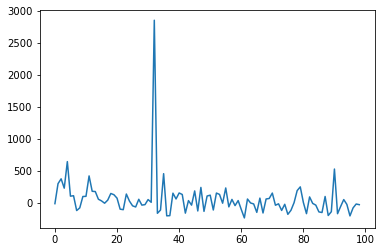

In [179]:
plt.plot(pred[1:100])

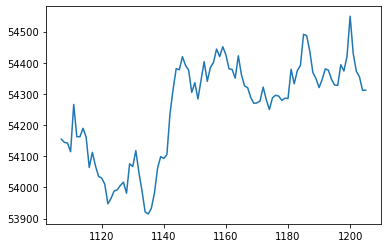

In [180]:
plt.plot(BTC_test_y[1:100])

In [ ]:
plt.plot("")

In [209]:
model = keras.models.Sequential([
 keras.layers.Reshape((1,1)),
 keras.layers.SimpleRNN(1, return_sequences=False),
 keras.layers.Dense(1)
])

In [210]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [211]:
%%time
history = model.fit(
    X_train['midpoint'], BTC_train_y,
    epochs=250,
    batch_size = 100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/250
561/561 [==============================] - 1s 861us/step - loss: 3111542336.6833 - val_loss: 2888495616.0000
Epoch 2/250
561/561 [==============================] - 0s 637us/step - loss: 3098593049.0534 - val_loss: 2876461824.0000
Epoch 3/250
561/561 [==============================] - 0s 638us/step - loss: 3086175480.2562 - val_loss: 2864463360.0000
Epoch 4/250
561/561 [==============================] - 0s 630us/step - loss: 3073912424.3132 - val_loss: 2852495104.0000
Epoch 5/250
561/561 [==============================] - 0s 631us/step - loss: 3062032983.0036 - val_loss: 2840556800.0000
Epoch 6/250
561/561 [==============================] - 0s 639us/step - loss: 3048887410.3345 - val_loss: 2828646144.0000
Epoch 7/250
561/561 [==============================] - 0s 639us/step - loss: 3037192880.7402 - val_loss: 2816763136.0000
Epoch 8/250
561/561 [==============================] - 0s 634us/step - loss: 3024417486.3488 - val_loss: 2804906240.0000
Epoch 9/250
561/561 [===========

Epoch 135/250
561/561 [==============================] - 0s 624us/step - loss: 1664486578.1068 - val_loss: 1502945664.0000
Epoch 136/250
561/561 [==============================] - 0s 626us/step - loss: 1656060745.5658 - val_loss: 1494292864.0000
Epoch 137/250
561/561 [==============================] - 0s 631us/step - loss: 1647751118.8043 - val_loss: 1485666432.0000
Epoch 138/250
561/561 [==============================] - 0s 638us/step - loss: 1636647279.6014 - val_loss: 1477064704.0000
Epoch 139/250
561/561 [==============================] - 0s 623us/step - loss: 1628731874.3915 - val_loss: 1468487040.0000
Epoch 140/250
561/561 [==============================] - 0s 620us/step - loss: 1620048661.8648 - val_loss: 1459934976.0000
Epoch 141/250
561/561 [==============================] - 0s 624us/step - loss: 1611021236.1566 - val_loss: 1451408000.0000
Epoch 142/250
561/561 [==============================] - 0s 622us/step - loss: 1602245009.7651 - val_loss: 1442905088.0000
Epoch 143/250
56

In [3]:
import tensorflow as tf

In [4]:
tf.config.list_physical_devices("GPU")

[]

In [30]:
df_with_RV = RealizedVolatility(BTC_df, 60)

<ipython-input-29-25c596f1309b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RV'][(i+freq)] = sum(df['midpoint'][i:(freq+i)]**2)


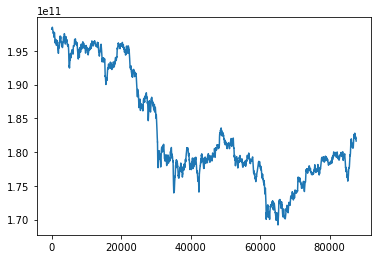

In [32]:
plt.plot(df_with_RV["RV"])

In [33]:
pls.plot('midpoint')

NameError: name 'pls' is not defined

In [28]:
test_df = BTC_df

In [23]:
test_df["test"] = 123

In [24]:
test_df["test"]

0        123
1        123
2        123
3        123
4        123
        ... 
87575    123
87576    123
87577    123
87578    123
87579    123
Name: test, Length: 87580, dtype: int64

In [25]:
test_df["test2"][1] = 123

KeyError: 'test2'

# LSTM 

In [ ]:
model = Sequential()

model.add(LSTM(
    input_dim=layers[0],
    output_dim=layers[1],
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    layers[2],
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=layers[3]))
model.add(Activation("tanh"))